## 2 A Little More on PyMC

### 2.1.1 Parent and Child Relationships

* __Parent variables__ are the variables that influence another variable.
* __Child variables__ are the variables that are affected by other variables - are the subject of parent variables.

A variable can be both a parent and child.

In [1]:
import pymc as pm

lambda_ = pm.Exponential('poisson_param', 1)
# used in the call to the next variable
data_generator = pm.Poisson('data_generator', lambda_)
data_plus_one = data_generator + 1

In [2]:
print('Children of lambda_:\n', lambda_.children)
print('\nParents of data_generator:\n', data_generator.parents)
print('\nChildren of data_generator:\n', data_generator.children)

Children of lambda_:
 {<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x000002390302C518>}

Parents of data_generator:
 {'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x0000023903018B00>}

Children of data_generator:
 {<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x0000023903018BA8>}


### 2.1.2 PyMC Variables

In [3]:
print('lambda_.value =', lambda_.value)
print('data_generator.value =', data_generator.value)
print('data_plus_one.value =', data_plus_one.value)

lambda_.value = 0.26414909384754887
data_generator.value = 1
data_plus_one.value = 2


PyMC is concerned with two types of programming variables:

 * __Stochastic variables (random)__ 
 * __Deterministic variables__
 
#### Initializing Stochastic Variables

some_variable = pm.DiscreteUniform('discrete_uni_var', 0, 4) - 0 and 4 are lower and upper bound of random variable.

#### Calling random():

We can also call on a stochastic variable's random() method, which (given the parent values) will generate a new, random value. The call to _random_ stores a new value into the variable's _value_ attribute. New value is stored in the computer's cache for faster recall and efficiency.

In [4]:
lambda_1 = pm.Exponential('lambda_1', 1)
lambda_2 = pm.Exponential('lambda_2', 1)
tau = pm.DiscreteUniform('tau', lower=0, upper=10)

print('lambda_1.value = {0:.3f}'.format(lambda_1.value))
print('lambda_2.value = {0:.3f}'.format(lambda_2.value))
print('tau.value = {0:.3f}'.format(tau.value))

lambda_1.random(), lambda_2.random(), tau.random()

print('\nAfter calling random() on the variables:')
print('lambda_1.value = {0:.3f}'.format(lambda_1.value))
print('lambda_2.value = {0:.3f}'.format(lambda_2.value))
print('tau.value = {0:.3f}'.format(tau.value))

lambda_1.value = 0.878
lambda_2.value = 1.631
tau.value = 10.000

After calling random() on the variables:
lambda_1.value = 0.849
lambda_2.value = 2.069
tau.value = 5.000


#### Deterministic Variables

@pm.deterministic  
def some_deterministic_var(v1=v1,):  
&nbsp;&nbsp;&nbsp;&nbsp;code

Elementary operations, like addition, exponentials, and so forth implicitly create deterministic variables.

In [5]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

Inside the deterministic decorator, the __Stochastic__ variables passed in behave like scalars or NumPy arrays (if multivariate), and not like stochastic variables.

@pm.deterministic  
def some_deterministic(stoch=some_stochastic_var):  
&nbsp;&nbsp;&nbsp;&nbsp;return stoch.value**2

This will return AttributeError. It simply needs to be stoch\*\*2 instead of stoch.value

### 2.1.3 Including Observations in the Model

We specified our priors. We can now look at the distribution:

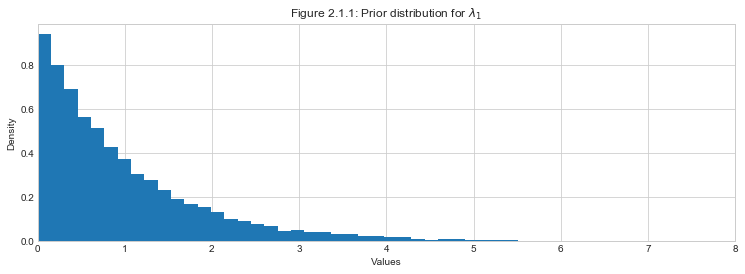

In [6]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype='stepfilled')
plt.title('Figure 2.1.1: Prior distribution for $\lambda_1$')
plt.xlabel('Values')
plt.ylabel('Density')
plt.xlim(0, 8);

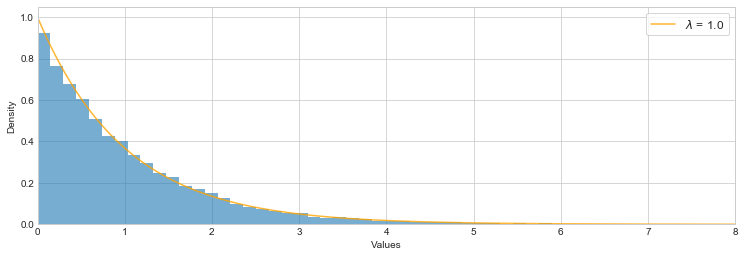

In [7]:
# trying scipy stats module
import numpy as np
from scipy.stats import expon
x = np.linspace(0, 8, 20000)

y_expon = expon.pdf(x, scale = 1.0)
r = expon.rvs(size=20000)

plt.plot(x, y_expon, c='orange', alpha=0.8, label='$\lambda$ = 1.0')
plt.hist(r, bins=70, normed=True, histtype='stepfilled', alpha=0.6)
plt.xlabel('Values')
plt.ylabel('Density')
plt.xlim(0, 8)
plt.legend(loc='upper right', frameon=True, fontsize='12');

PyMC stochastic variables have a keyword argument __observed__ which accepts a boolean (False by default). The keyword observed has a very simple role: fix the variable's current value, i.e. make value immutable.

In [8]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print('value:', fixed_variable.value)
print('calling .random()')
fixed_variable.random()
print('value:', fixed_variable.value)

value: [10  5]
calling .random()
value: [10  5]


### 2.1.4 Finally...

We wrap all created variables into a pm.Model class. 

In [9]:
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [10]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

p.33